# Baseline Implementation

> This is a simple baseline CNN implementation to recognize images of sign language digits.

In [14]:
# libraries:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

### Loading and preprocessing the data

For preprocessing: 
1. the dataset came already normalized
2. We added a channel dimension to get grayscale images
3. We split the data into training and testing sets (80% train, %20 test)
4. And converted one-hot labels to integers
5. Plotted the images to check the labels & preprocessing

In [15]:
# Load images and labels
X = np.load('data/X.npy').astype('float32')
y = np.load('data/Y.npy')

In [16]:
# Add channel dimension (grayscale)
X = X.reshape(-1, 64, 64, 1)  # New shape: (2062, 64, 64, 1)

In [17]:
# Train-Test Split (80% train, %20 test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [18]:
# Convert one-hot labels to integers 
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

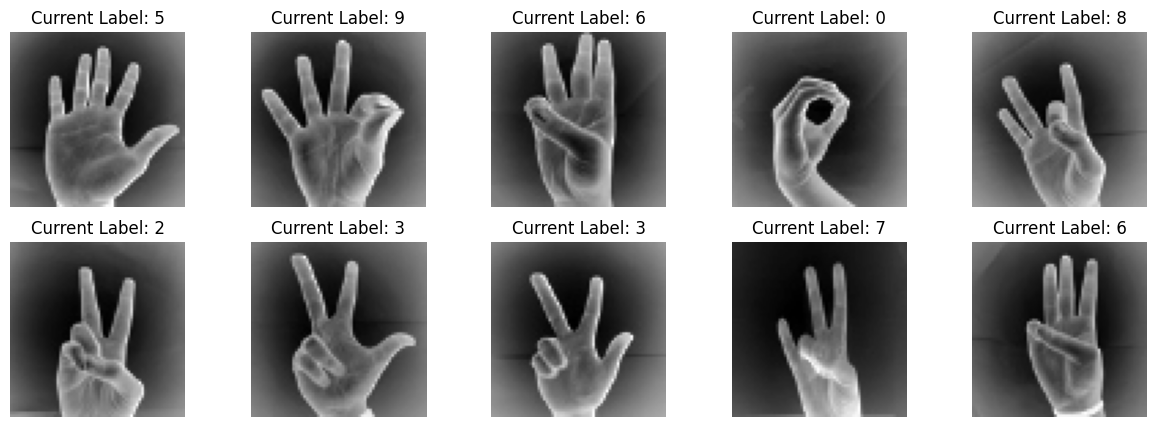

In [19]:
# Plot to make sure the data is loaded properly
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].squeeze(), cmap='gray')  # Remove channel dim
    plt.title(f"Current Label: {y_train[i]}")
    plt.axis('off')
plt.show()

### Baseline CNN Implementation

This CNN architecture is inspired by LeNet-5, and the structure looks like: 
1. Input Layer: Matched with our images that are 64x64 pixels and grayscale 
2. Convolutional Layers: 
- First Conv2D(32, (3,3)): <br> - uses 32 filters to detect basic features <br> - uses 3x3 kernal <br> - uses Relu activation function
- Second Conv2D(64, (3, 3)): <br> - uses 64 filters to capture higher-level patterns (like the fingure shapes) <br> same kernal size and activation function
3. Max Pooling Layers: help reduce the spatial dimensions from 64x64 → 32x32 → 16x16
4. Flatten Layer: Converts the 3D feature maps (16x16x64) into a 1D vector (16384 values) to feed into dense layers
5. Dense (Fully Connected) Layers: 
- Dense(64): Acts as a "classifier" on top of the extracted features
- Dense(10, softmax): Outputs probabilities for each of the 10 digit classes (0–9)

To compile and evalute the model we used:
- Adam optimizer: Because it's adaptive (since handels varying gradients automatically), fast, and has default hyperparameters that require minimum tunning.
- Cross-entropy loss function.

In [20]:
# Defining a basic CNN model
def build_baseline_cnn(input_shape=(64, 64, 1), num_classes=10):
    model = models.Sequential([
        # Convolutional Layers
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        # Dense Layers
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [21]:
model = build_baseline_cnn()
model.summary()

/Users/anthamorious/Library/Mobile Documents/com~apple~CloudDocs/University/University of Houston/Semesters/🎓 Spring 2025/🌹 COSC 4337 - Data Science II/Project/Progress Report/baseline_code/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 822,346 (3.14 MB)

 Trainable params: 822,346 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.2440 - loss: 2.1168 - val_accuracy: 0.6416 - val_loss: 1.0598
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7023 - loss: 0.8865 - val_accuracy: 0.7409 - val_loss: 0.7423
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8315 - loss: 0.5344 - val_accuracy: 0.7554 - val_loss: 0.6967
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8868 - loss: 0.3516 - val_accuracy: 0.8329 - val_loss: 0.5631
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9161 - loss: 0.2912 - val_accuracy: 0.8475 - val_loss: 0.5588
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9506 - loss: 0.1879 - val_accuracy: 0.8765 - val_loss: 0.4626
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9570 - loss: 0.1282 - val_accuracy: 0.8717 - val_loss: 0.4698
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9826 - loss: 0.0878 - val_accuracy: 0.8692 - v

In [23]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Baseline Test Accuracy: {test_acc:.4f}")

13/13 - 0s - 9ms/step - accuracy: 0.8717 - loss: 0.5748
Baseline Test Accuracy: 0.8717


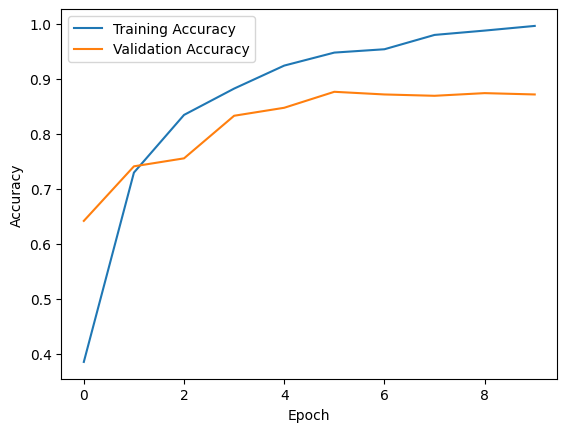

In [24]:
# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Evaluate Predictions with Confusion Matrix & Classification Report


In [25]:
# Predict on Test Set
y_pred = model.predict(X_test).argmax(axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


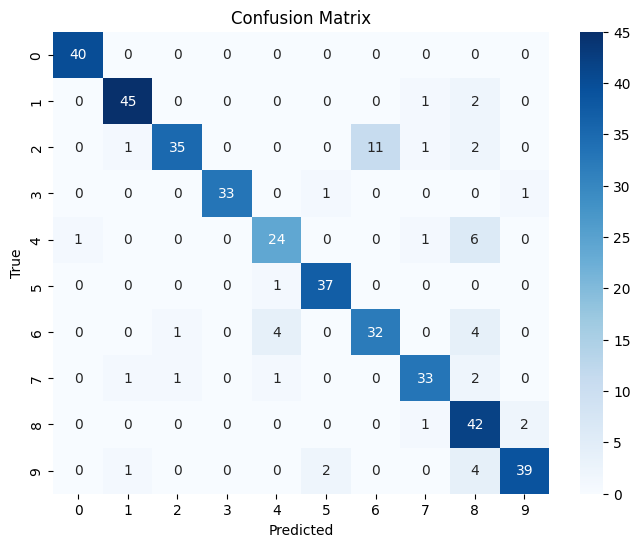

In [26]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [27]:
# Precision, Recall, F1-Score Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       0.94      0.94      0.94        48
           2       0.95      0.70      0.80        50
           3       1.00      0.94      0.97        35
           4       0.80      0.75      0.77        32
           5       0.93      0.97      0.95        38
           6       0.74      0.78      0.76        41
           7       0.89      0.87      0.88        38
           8       0.68      0.93      0.79        45
           9       0.93      0.85      0.89        46

    accuracy                           0.87       413
   macro avg       0.88      0.87      0.87       413
weighted avg       0.88      0.87      0.87       413



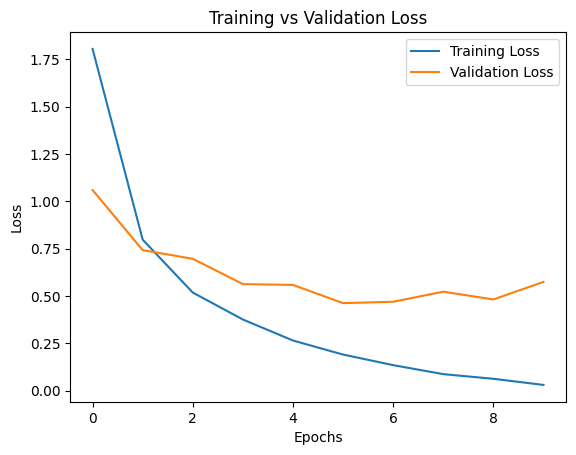

In [28]:
# Plot Training vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() 
plt.title('Training vs Validation Loss')
plt.show()